In [1]:
#importing the dependencie

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [81]:
# data collection and processing

df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.shape

(4340, 8)

In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [12]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner


In [45]:
#Encoding the Categorical Data

df['fuel'].value_counts()
df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2, 'LPG':3, 'Electric':4}},inplace=True)


In [54]:
df['seller_type'].value_counts()
df.replace({'seller_type':{'Dealer':0,'Individual':1, 'Trustmark Dealer':2}},inplace=True)
df['seller_type']

0       1
1       1
2       1
3       1
4       1
       ..
4335    1
4336    1
4337    1
4338    1
4339    1
Name: seller_type, Length: 4340, dtype: int64

In [57]:
df['transmission'].value_counts()
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
df['transmission']

transmission
0    3892
1     448
Name: count, dtype: int64

In [73]:
df['owner'].value_counts()
df.replace({'owner':{'First Owner':0,'Second Owner':1, 'Third Owner':2,'Fourth & Above Owner':3, 'Test Drive Car':4}},inplace=True)
df['owner']

0       0
1       0
2       0
3       0
4       1
       ..
4335    1
4336    1
4337    1
4338    0
4339    0
Name: owner, Length: 4340, dtype: int64

In [65]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0


In [74]:
#Splitting the data and Target

X = df.drop(['name','selling_price'],axis=1)
Y = df['selling_price']

In [75]:
#Splitting Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [76]:
X_train.shape, X_test.shape

((3906, 6), (434, 6))

In [77]:
#Model Training

model = LinearRegression()
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
#Model Evaluation

training_data_prediction = model.predict(X_train)

In [82]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4276361285018685


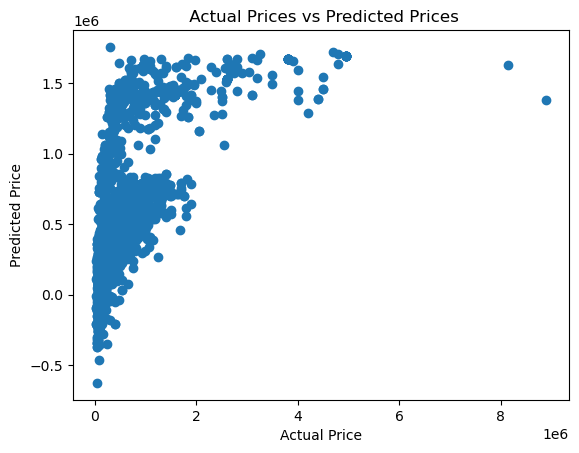

In [83]:
#Visualize the actual prices and Predicted prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()